## Importing Libraries

In [53]:
import pandas as pd
from matplotlib import pyplot as plt

## Loading Data

In [54]:
df = pd.read_csv('Zomato.csv',delimiter='|')
df.head()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


## Number of Rows VS Columns

In [55]:
df.shape

(15081, 12)

## Dropping duplicates and null values

In [57]:
df.dropna(axis=0, how='any', inplace=True)

df.drop_duplicates(inplace=True,keep=False)

df.drop(columns=['CITY','URL','PAGE NO','TIMING','VOTES'],inplace=True)

df.head(5)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,RATING_TYPE,RATING
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,Excellent,4.9
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,Very Good,4.4
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,Very Good,4.2
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,Very Good,4.3
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,Veľmi dobré,4.4


## Renaming Columns

In [58]:
df.rename({'CUSINE_CATEGORY' : 'CUISINE_CATEGORY', 'CUSINE TYPE' : 'OUTLET_TYPE', 'RATING_TYPE': 'REVIEWS'},axis=1, inplace=True)

df.head()

,NAME,PRICE,CUISINE_CATEGORY,REGION,OUTLET_TYPE,REVIEWS,RATING
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,Excellent,4.9
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,Very Good,4.4
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,Very Good,4.2
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,Very Good,4.3
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,Veľmi dobré,4.4


## Cleaning Rating Column

In [59]:
df['RATING'] = df.apply(lambda x: 0 if x['RATING'] in ['-','NEW','Opening'] else x['RATING'], axis=1)
df['RATING'].unique()

array(['4.9', '4.4', '4.2', '4.3', '4.5', '4.7', '4.0', '4.6', '4.1',
       '3.9', '3.8', 0, '3.6', '3.4', '3.0', '3.7', '4.8', '3.3', '3.5',
       '3.2', '3.1', '2.7', '2.5', '2.8', '2.6', '2.3', '2.9', '2.4',
       '2.1', '2.2', '1.8', '2.0'], dtype=object)

## Cleaning price column

In [60]:
df['PRICE'].unique()

array(['1200', '400', '1800', '1000', '800', '1300', '1500', '600',
       '1400', '1100', '2000', '350', '900', '700', '500', '1600', '150',
       '300', '550', '450', '650', '750', '250', '200', '850', '100',
       '2500', '1450', '180', '950', '1700', '1900', '2600', '2400',
       '3000', '1250', '3200', '505', '2200', '1050', '1650', '1350',
       '50', '920', '1150', '1550', '3500', '398', '5000', '120', '220',
       '160', '340', '5', '480', '2100', '580', '1850', '249', '80',
       '2300', '360', '3502', '248', '2700'], dtype=object)

## Cleaning reviews column

In [61]:
df['REVIEWS'].replace(to_replace='Excelente' , value='Excellent', inplace=True)
df['REVIEWS'].replace(to_replace=['Veľmi dobré','Bardzo dobrze','Muy Bueno','Velmi dobré'] , value='Very Good', inplace=True)
df['REVIEWS'].replace(to_replace=['Skvělá volba','Dobrze','Bueno','Buono','Dobré','Bom','Skvělé'] , value='Good', inplace=True)
df['REVIEWS'].replace(to_replace=['Priemer','Média','Çok iyi'] , value='Average', inplace=True)
df['REVIEWS'].replace(to_replace=['Průměr','Promedio','Ortalama','Muito Bom','İyi'] , value='Poor', inplace=True)
df['REVIEWS'].replace(to_replace=['Baik','Biasa','Media','Sangat Baik'] , value='Very Poor', inplace=True)
df['REVIEWS'].replace(to_replace=['None'] , value='Not Rated', inplace=True)
df['REVIEWS'].unique()

C:\Users\Kunal\AppData\Local\Temp\ipykernel_16060\2546893848.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['REVIEWS'].replace(to_replace='Excelente' , value='Excellent', inplace=True)
C:\Users\Kunal\AppData\Local\Temp\ipykernel_16060\2546893848.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

array(['Excellent', 'Very Good', 'Good', 'Not rated', 'Average', 'Poor',
       'Very Poor'], dtype=object)

## Cleaning region column

In [62]:
df['REGION'] = df['REGION'].str.replace('[a-zA-Z].+-- ','',regex=True)
df['REGION'] = df['REGION'].str.replace(' West| west| East| east','',regex=True)

## Cleaning REGION column - 2, replacing with base region

In [63]:
df['REGION'] = df['REGION'].str.replace('4 Bungalows|7 Andheri|Azad Nagar|Near Andheri Station|Veera Desai Area|Mahakali','Andheri',regex=True)
df['REGION'] = df['REGION'].str.replace('Bandra Kurla Complex','Bandra',regex=True)
df['REGION'] = df['REGION'].str.replace('CBD-Belapur','CBD Belapur',regex=True)
df['REGION'] = df['REGION'].str.replace('Girgaon Chowpatty','Chowpatty',regex=True)
df['REGION'] = df['REGION'].str.replace('Dadar Shivaji Park','Dadar',regex=True)
df['REGION'] = df['REGION'].str.replace('Flea Bazaar Café|Kamala Mills Compound','Lower Parel',regex=True)
df['REGION'] = df['REGION'].str.replace('Runwal Green','Mulund',regex=True)
df['REGION'] = df['REGION'].str.replace('Mumbai CST Area','Mumbai Central',regex=True)
df['REGION'] = df['REGION'].str.replace('Kopar Khairane|Seawoods|Turbhe|Ulwe','Navi Mumbai',regex=True)
df['REGION'] = df['REGION'].str.replace('New Panvel|Old Panvel','Panvel',regex=True)
df['REGION'] = df['REGION'].str.replace('Kamothe','Sion',regex=True)
df['REGION'] = df['REGION'].str.replace('Ghodbunder Road|Majiwada','Thane',regex=True)

In [64]:
df['REGION'].unique()

array(['Bandra', 'Mahim', 'Juhu', 'Lower Parel', 'Marol', 'Andheri',
       'Dadar', 'Khar', 'Mumbai Central', 'Bhandup', 'Malad', 'Powai',
       'Chembur', 'Goregaon', 'Vile Parle', 'CBD Belapur', 'Ghansoli',
       'Borivali', 'Vasai', 'Thane', 'Worli', 'Parel', 'Colaba',
       'Nariman Point', 'Santacruz', 'Mulund', 'Kandivali', 'Airoli',
       'Mira Road', 'Fort', 'Jogeshwari', 'Vashi', 'Ghatkopar', 'Byculla',
       'Kalyan', 'Bhayandar', 'Sakinaka', 'Charni Road', 'Chandivali',
       'Mohammad Ali Road', 'Kharghar', 'Matunga', 'Ulhasnagar',
       'Navi Mumbai', 'Dahisar', 'Kurla', 'Chowpatty', 'Panvel', 'Sion',
       'Tardeo', 'Mazgaon', 'Prabhadevi', 'Sanpada', 'Virar', 'Girgaum',
       'Mumbra', 'Marve', 'Marine Lines', 'Mahalaxmi', 'Chakala',
       'Nalasopara', 'Kalwa', 'Nerul', 'Grant Road', 'Breach Candy',
       'Churchgate', 'Vikhroli', 'Kalbadevi', 'Dombivali', 'Kemps Corner',
       'Malabar Hill', 'Kalamboli', 'Wadala', 'Alibaug', 'Peddar Road',
       'Amberna

## Checking if null values

In [65]:
df.isnull().sum()

NAME                0
PRICE               0
CUISINE_CATEGORY    0
REGION              0
OUTLET_TYPE         0
REVIEWS             0
RATING              0
dtype: int64

## Changing data types of columns

In [66]:
df = df.astype({'NAME':str, 'PRICE':int, 'CUISINE_CATEGORY':str, 'OUTLET_TYPE':'category','REVIEWS':'category', 'RATING':float})

## Finding price ranges for restaurants

In [67]:
df['PRICE'] = pd.cut(df['PRICE'], [0,500,1000,3000,5000], labels=['0-500','500-1000','1000-3000','3000-5000'])
df['PRICE'].value_counts()

PRICE
0-500        9144
500-1000     3402
1000-3000     570
3000-5000       4
Name: count, dtype: int64

## Plotting Graph between number of restaurant and price range

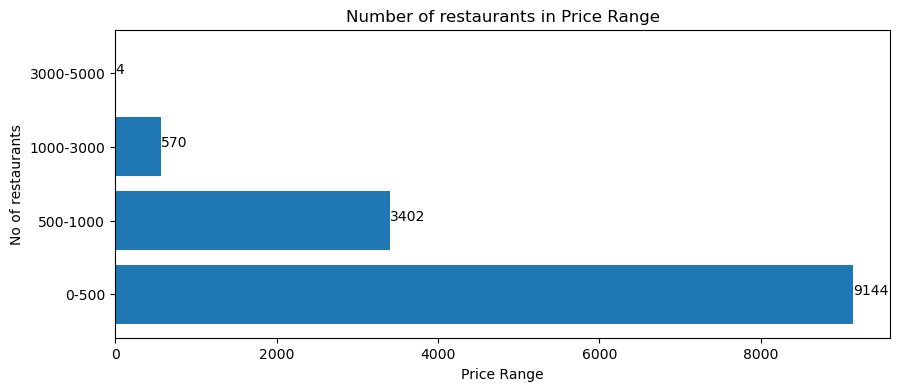

In [81]:
x = df['PRICE'].value_counts().index
y = df['PRICE'].value_counts().values
plt.figure(figsize=(10, 4))
plt.barh(x,y)
plt.title("Number of restaurants in Price Range")
plt.xlabel("Price Range")
plt.ylabel("No of restaurants")
for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.show()

## Grouping rating in three categories

In [70]:
df['RATING'] = pd.cut(df['RATING'], [2,3,4,5], labels=['Low','Medium','High'])
df['RATING'].value_counts()

RATING
Medium    8248
Low       1670
High       841
Name: count, dtype: int64

## Plotting Graph for percentage of restaurants as per ratings

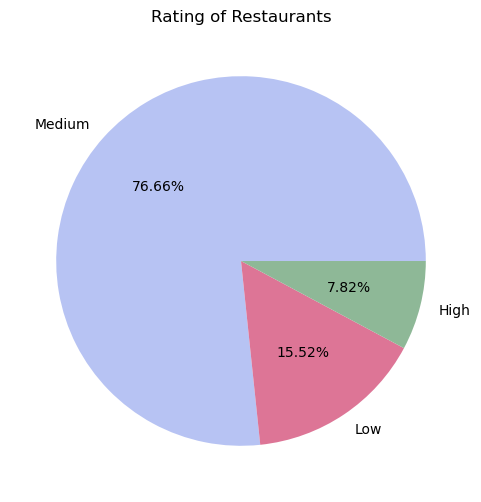

In [71]:
x = df['RATING'].value_counts().index
y = df['RATING'].value_counts().values
plt.figure(figsize=(6, 6))
plt.pie(y,labels=x,colors=['#B7C3F3', '#DD7596', '#8EB897'],autopct='%1.2f%%')
plt.title("Rating of Restaurants")
plt.show()

## Top 10 types of outlets

In [72]:
df['OUTLET_TYPE'].value_counts().nlargest(10)

OUTLET_TYPE
Quick Bites       4744
Casual Dining     4598
none              1547
Bakery             730
Dessert Parlor     557
Café               332
Sweet Shop         161
Beverage Shop      111
Food Court          75
Dhaba               51
Name: count, dtype: int64

## Plotting Graph between no. of restaurant and type of outlet

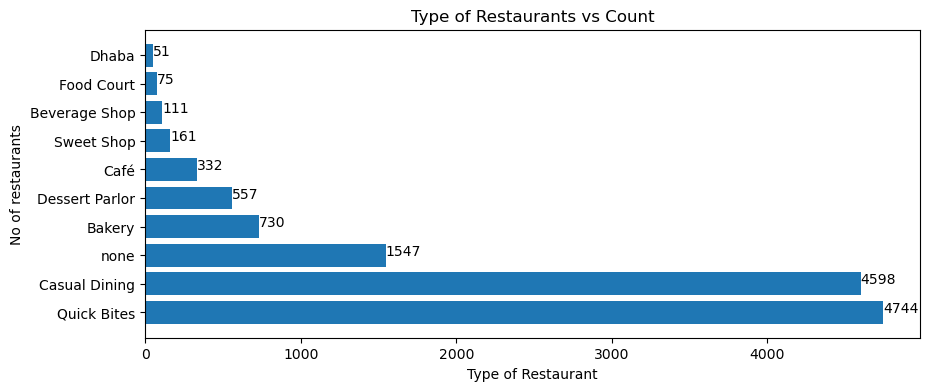

In [73]:
x = df['OUTLET_TYPE'].value_counts().nlargest(10).index
y = df['OUTLET_TYPE'].value_counts().nlargest(10).values
plt.figure(figsize=(10, 4))
plt.title("Type of Restaurants vs Count")
plt.xlabel("Type of Restaurant")
plt.ylabel("No of restaurants")
plt.barh(x,y)
for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.show()

## Finding all the different type of cuisines served

In [75]:
df1 = df['CUISINE_CATEGORY'].str.split(',')


## Top 5 Cuisines served

In [76]:
xy = df1.explode().value_counts().nlargest(5)

## How many percentage of restaurants serves top 5 cuisines

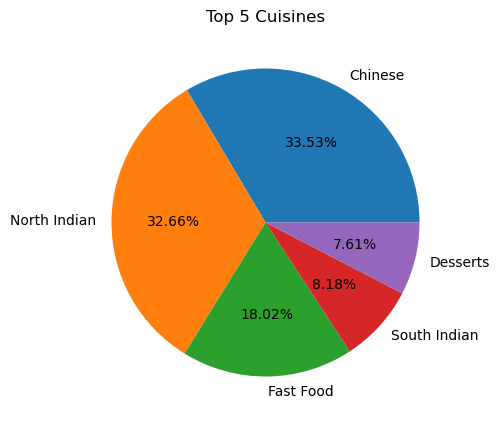

In [77]:
x = xy.index
y = xy.values/df.count().NAME
plt.figure(figsize=(5, 5))
plt.pie(y,labels=x,autopct='%1.2f%%')
plt.title("Top 5 Cuisines")
plt.show()

## Restaurants reviews count

In [78]:
df['REVIEWS'].value_counts()

REVIEWS
Average      5113
Good         4344
Not rated    2359
Very Good    1147
Excellent      96
Poor           57
Very Poor       4
Name: count, dtype: int64

## Top 10 Regions with most number of restaurants

In [79]:
df['REGION'].value_counts().nlargest(10)

REGION
Andheri      1087
Thane         918
Mira Road     523
Malad         451
Kandivali     447
Bandra        432
Goregaon      407
Dombivali     380
Borivali      365
Chembur       334
Name: count, dtype: int64

## Region vs No of restaurants.

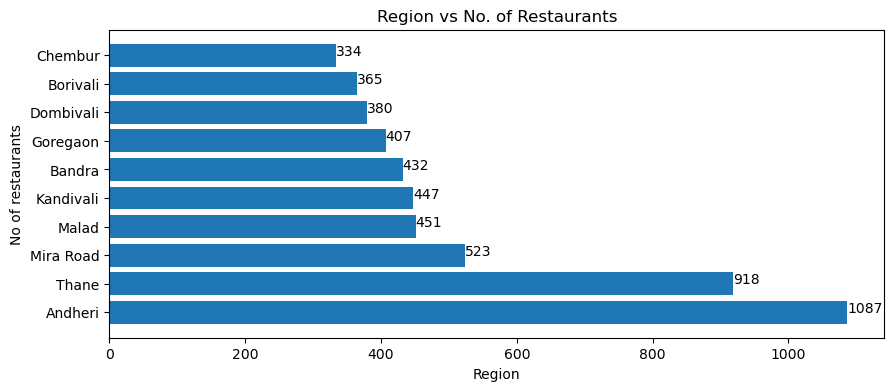

In [80]:
x = df['REGION'].value_counts().nlargest(10).index
y = df['REGION'].value_counts().nlargest(10).values
plt.figure(figsize=(10, 4))
plt.title("Region vs No. of Restaurants")
plt.ylabel("No of restaurants")
plt.xlabel("Region")
plt.barh(x,y)
for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.show()